Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and remove every line containing the expression: "raise ..." (if you leave such a line your code will not run).

Do not remove any cell from the notebook you downloaded. You can add any number of cells (and remove them if not more necessary).

Do not leave any variable initialized to None.

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!!!

## Make sure to name your notebook file (.ipynb) correctly:
### - HW1_LC_NAMESURNAME_ID (E.g. : HW1_LC_MARIOROSSI_2204567)

## Fill in your name, surname and id number (numero matricola) below:

In [1]:
NAME = "NIHAL SURI"
ID_number = int("2141819")

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# Classification on Wine Dataset

### Dataset description

We will be working with a dataset on wines from the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine ). It contains data for 178 instances. 
The dataset is the results of a chemical analysis of wines grown in the same region
in Italy but derived from three different cultivars. The analysis determined the
quantities of 13 constituents found in each of the three types of wines. 

### The features in the dataset are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
-Proline




We first import all the packages that are needed

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
from sklearn import datasets
from sklearn import linear_model
import copy

In [3]:
np.random.seed(ID_number)

# Perceptron
We will implement the perceptron and use it to learn a halfspace with 0-1 loss.

Load the dataset from scikit learn and then split in training set and test set (50%-50%) after applying a random permutation to the dataset.

In [4]:
# Load the dataset from scikit learn
wine = datasets.load_wine()
# Get input and output data from the dataset
X = wine.data
Y = wine.target
# Create new labels
Y = np.where(Y == 0, -1, Y)
Y = np.where(Y == 2, -1, Y)
# Let's get the number of features
d = X.shape[1]

In [5]:
##### Helper functions, do not modify them. You will need them for the first TODO
def check_constraints(labels, all_possibile_labels, min_num_istances):
    # Count the number of occurrences using numpy
    unique, counts = np.unique(labels, return_counts=True)
    if len(all_possibile_labels) != len(unique):
        return True  #there are not all the labels
    if (counts >= min_num_istances).all():
        return False #there are enough istances of each label
    else:
        return True  #there are not enough istances of each label
    
def need_new_shuffle(y_train, y_test, all_possibile_labels, min_num_istances):    #understands if the training and test are ok  
    return (check_constraints(y_train, all_possibile_labels, min_num_istances) or #train set not ok 
            check_constraints(y_test, all_possibile_labels, min_num_istances))    #test set not ok

In [6]:
# TODO 1
# Write a function (create_train_val_test_datasets) which takes as input a dataset and returns 2 datasets: 
# S_t and S_test (different runs are supposed to return different datasets).
# Write a function (create_train_val_test_datasets_with_constraints) which splits our data in S_t and S_test with 
# the additional constraint that in each dataset we MUST have more than min_num_istances per class.
# Each dataset is represented as a matrix m \times d (numpy ndarray), where m is the number of data and d is the 
# number of features.
# To solve this TODO use the functions we provide you: need_new_shuffle (and therefore check_constraints)

def create_train_val_test_datasets(features : np.ndarray, labels: np.ndarray, m_t : int, m_test : int):
    '''
    Create training (S_t) and test (S_test) sets starting from a dataset. 
    This function shuffles the complete dataset before creating the subsets. 
    If you call this function twice it is expected to get different S_t, S_test. 
    
    :param features: NumPy ndarray containing all the input data data we can use
    :param labels: NumPy ndarray containing all the labels we have
    :param m_t: Number of samples for the training dataset
    :param m_test: Number of samples for the test dataset
    
    :returns: (x_train, y_train, x_test, y_test)
    :rtype: tuple
        WHERE
        x_train : np.ndarray features in the training dataset
        y_train : np.ndarray labels in the training dataset
        x_test : np.ndarray features in the test dataset
        y_test : np.ndarray labels in the test dataset
    '''
    # SUGGESTION: Use the function np.random.permutation (see the documentation) to create a permutation of the 
    #             dataset indexes. Then use these shuffled indexes to create S_t, S_val, S_test
    # YOUR CODE HERE

    # First Method
    # dataset = np.column_stack((features, labels.T))
    # permuted_dataset = np.random.permutation(dataset)
    # S_t = permuted_dataset[0:m_t]
    # S_test = permuted_dataset[m_t:m_t + m_test]

    # y_train = S_t[:, -1]
    # x_train = S_t[:, :-1]

    # y_test = S_test[:, -1]
    # x_test = S_test[:, :-1]
    
    # Second method: 
    random_indices = np.random.choice(features.shape[0], features.shape[0], replace=False)

    features = features[random_indices]
    labels = labels[random_indices]

    x_train = features[0:m_t]
    y_train = labels[0:m_t]

    x_test = features[m_t: m_t + m_test]
    y_test = labels[m_t: m_t + m_test]

    return x_train, y_train, x_test, y_test


def create_train_val_test_datasets_with_constraints(features : np.ndarray, labels: np.ndarray, m_t : int, 
                                                    m_test : int, min_num_istances : int):
    '''
    Same as function above but now we are imposing the constraints: the splitted datasets are assumed to contain 
    at least min_num_istances per class.
    
    ...
    :param min_num_istances: Minimum number of istances per class in each of the splitted datasets
    ...
    
    '''
    all_possibile_labels = np.unique(labels)
    # YOUR CODE HERE
    
    while True:
        x_train, y_train, x_test, y_test = create_train_val_test_datasets(features=features, labels=labels, m_t=m_t, m_test=m_test)
        if not need_new_shuffle(y_train, y_test, all_possibile_labels, min_num_istances):
            break 

    return x_train, y_train, x_test, y_test

m_t = 80
x_train, y_train, x_test, y_test = create_train_val_test_datasets_with_constraints(X, Y, m_t, len(Y)-m_t, 25)

In [7]:
assert x_train.shape == (m_t,       x_train.shape[1]) # here we are comparing two tuples (it is an element wise comparison)
assert x_test.shape  == (len(Y)-m_t, x_test.shape[1])

In [8]:
# to check if the function with constraints worked as expected 
unique_t, counts_t = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print(dict(zip(unique_t, counts_t)))
print(dict(zip(unique_test, counts_test)))

{-1: 47, 1: 33}
{-1: 60, 1: 38}


In [9]:
# Let's add a 1 in front of each sample so that we can use a vector to describe all the coefficients of the model.
# Do not run this cell multiple times otherwise you will continue adding ones... 
# (we add the assert to avoid such issue)

assert x_train.shape[1] == d
assert x_test.shape[1] == d 

x_train = np.hstack((np.ones((x_train.shape[0],1)), x_train))
x_test  = np.hstack((np.ones((x_test.shape[0],1)),  x_test))

## TO DO 2

Now complete the function `perceptron`. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where 1 iteration corresponds to 1 update of the perceptron weights. If the perceptron returns because the maximum number of iterations has been reached, you should return an appropriate model (the best seen along the iterations). 

The input parameters to pass are:
- `X`: the matrix of input features, one row for each sample
- `Y`: the vector of labels for the input features matrix X
- `max_num_iterations`: the maximum number of iterations for running the perceptron

The output values are:
- `best_w`: the vector with the coefficients of the best model.
- `best_error`: the fraction of missclassified samples for the best model. (# missclassified/# possible errors)

- `w_iters`: a list of the coefficients found by the algorithm at each iteration. This is an 'auxiliary output' (it is not needed for the actual algorithm) that will allows us to have a better insight on the algorithm's behaviour.
- `error_iters`: a list containing the fraction of missclassified samples at each iteration. (Again an auxiliary output).

- `w_bestIters`: a list of the current best coefficients selected by the algorithm at each iteration (Again an auxiliary output) 
- `error_bestIters`: a list of the fraction of missclassified samples for current best model at each iteration. (Again an auxiliary output).

Note that `w_iters`, `error_iters`, `w_bestIters` and `error_bestIters` contain the history/evolution of the algorithm and must be of the same length.

---

**Auxiliary functions**

In order to correctly complete the perceptron function it is warmly recommended to define some auxiliary functions (`find_missclassified` and `choose_missclassified`). 

.


`find_missclassified`: This function looks for missclassified data points in the dataset `X`.

The input parameters to pass are:
- `X`: the matrix of input features, one row for each sample
- `Y`: the vector of labels for the input features matrix X
- `curr_w`: the current value of the parameter vector *w*

The output value is:
- `missclassified_indeces`: a numpy array cointaining all the missclassified indeces  

.


`choose_missclassified`: This function returns one single index choosen from a array of indeces. If the array is empty it returns a non valid index: -1. 

The input parameters to pass are:
- `missclassified_indeces`: numpy array containing missclassified indeces

The output value is:
- `index`: Integer (or np.int64) containing the choosen index


In [10]:
# TODO 2

def find_missclassified(X,Y,curr_w):
    # Here you can use np.argwhere to find which model predictions are correct (this is faster than a for loop)
    # but be careful on the dimensions of your predictions vector and Y vector.
    # YOUR CODE HERE

    # all values from the multiplication of y[w*x]
    values = Y*np.matmul(curr_w,X.T)
    
    # all values that are lesser than or equal to 0
    missclassified_indeces = np.argwhere(values <= 0)

    # get all the indeces of these values from the original array
    # missclassified_indeces = np.where(np.isin(values, missclassified_values))[0]

    ##########################################################################
    # values = []
    # for i in range(Y):
    #     values[i] = Y[i]*np.matmul(curr_w, X[i].T)
    ########################################################################
    return missclassified_indeces.reshape(-1,)

def choose_missclassified(missclassified_indeces):
    # YOUR CODE HERE
    if len(missclassified_indeces) == 0: 
        index = -1
    else: 
        index = missclassified_indeces[0]
    return index

def perceptron(X,Y,max_num_iterations):
    #INITIALIZATION
    curr_w = np.zeros(X.shape[1])
    best_w = curr_w
    num_samples = X.shape[0]
    best_num_of_missclassified = num_samples+1
    w_iters = []
    error_iters = []
    w_bestIters = []
    error_bestIters = []
    
    missclassified_indeces = find_missclassified(X,Y,curr_w)
    num_missclassified = len(missclassified_indeces)
    index_missclassified = choose_missclassified(missclassified_indeces)
    
        
    num_iter = 1  
    best_error = 1
    while num_missclassified > 0 and num_iter <= max_num_iterations:
        # Write the update rule
        # YOUR CODE HERE
        num_iter += 1
        curr_w = curr_w + Y[index_missclassified]*X[index_missclassified]
        
        # Update missclassified data points and choose a new missclassified data point
        # YOUR CODE HERE
        missclassified_indeces = find_missclassified(X, Y, curr_w)
        num_missclassified = len(missclassified_indeces)
        index_missclassified = choose_missclassified(missclassified_indeces)
        error = num_missclassified/num_samples

        # Update (if necessary) the best error achieved together with the best parameter up to now. 
        # Use copy.copy(curr_w) to copy your current w on "best_w"
        # (since these are arrays you would be copying only the pointer if you do not use copy.copy)
        # and to append curr_w, best_w, error_iters, best_error to the above mentioned lists
        # YOUR CODE HERE
        if error < best_error: 
            best_error = num_missclassified/num_samples
            best_w = copy.copy(curr_w)

        w_iters.append(curr_w)
        error_iters.append(error)
        w_bestIters.append(best_w)
        error_bestIters.append(best_error)

    return best_w, best_error, w_bestIters, error_bestIters, w_iters, error_iters


In [11]:
index = choose_missclassified(np.array(list(range(100))))
assert type(index) == np.int64 or type(index) == int or type(index) == np.int32


In [12]:
# Now run the perceptron for 100 iterations
# We want just to see the output of the algorithm, so we can avoid assigning the auxiliary outputs to actual variables
w_found, training_error, _, _, _,_ = perceptron(x_train, y_train, 100)
print("Training error with 100 iterations: " + str(training_error))


Training error with 100 iterations: 0.4125


In [13]:
# TODO 3 
# Write a function to compute the fraction of missclassified samples given two nd.array vectors of shape number of 
# data times 1 (column vectors)
def classification_loss(y_target : np.ndarray, predictions : np.ndarray) -> float:
    '''
    This function computes the fraction of missclassified samples given two vectors: true labels and predictions. 
    :param y_target: output labels
    :param predictions: predictions
    
    :return: Fraction of missclassified samples
    '''
    # YOUR CODE HERE
    missclassified_indeces = np.where(y_target != predictions)[0]
    return missclassified_indeces.shape[0] / y_target.shape[0]

# Write a function to compute the fraction of missclassified samples for a generic dataset given inputs, targets and 
# a vector w. Hint: you can use the function classification_loss defined above
def compute_fraction_missclassified(X : np.ndarray, Y : np.ndarray, w : np.ndarray) -> float:
    '''
    This function computes the fraction of missclassified samples of model parametrized by w on the data X w.r.t. 
    targets Y. 
    :param X: input locations
    :param Y: targets
    :param w: parameters of the model to be tested
    
    :return: Fraction of missclassified samples
    '''
    # YOUR CODE HERE
    values = np.matmul(w,X.T)
    values[values > 0] = 1
    values[values < 0] = -1
    fraction_missclass = classification_loss(Y, values)
    return fraction_missclass

In [14]:
assert classification_loss(np.array([[1],[3]]), np.array([[1],[3]])) == 0
assert classification_loss(np.array([[1],[2]]), np.array([[1],[3]])) == 0.5
y_labels, y_predictions = np.random.choice(10, 1000000), np.random.choice(10, 1000000)
assert np.isclose(classification_loss(y_labels, y_predictions), 0.9, atol=0.01)
assert training_error == compute_fraction_missclassified(x_train, y_train, w_found)


In [15]:
# now run the perceptron for 1000000 iterations
w_found, training_error, w_listBest, error_list_trainBest, w_list, error_list_train = perceptron(x_train, y_train, 1000000)
print(f"Training Error for 1000000 iterations is {compute_fraction_missclassified(x_train, y_train, w_found):.4f}")
print(f"Test Error for 1000000 iterations is {compute_fraction_missclassified(x_test, y_test, w_found):.4f}")

Training Error for 1000000 iterations is 0.0375
Test Error for 1000000 iterations is 0.0510


**TO DO 4**: We want to have a better understanding of the hidden behaviour of perceptron algorithm. We indeed defined four auxiliary outputs that should allow us to inspect the training process in more depth. In particular, we want to check if the sequence of models' errors found through the different iterations is characterized by a decreasing trend, with respect to both training and test datasets.

The function `perceptron` already returns the sequence of errors, which is ready to be plotted. However, the errors for the test set aren not immediately available: we nonetheless have all different models, thus we can easily compute them! 

In [16]:
# TODO 4
# Write a function 'error_models' which takes as input a list of models (each of which is a numpy ndarray) and returns
# a list of corresponding errors for a generic dataset
# Suggestion: you can use 'compute_fraction_missclassified' from above to solve this TODO

def error_models(X : np.ndarray, Y : np.ndarray, w_l : list) -> list:
    '''
    This function computes the fraction of missclassified samples of model parametrized by w on the data X w.r.t. 
    targets Y. 
    :param X: input locations
    :param Y: targets
    :param w: list of arrays (models) to be tested
    
    :return: List of fraction of missclassified samples for each model
    '''
    errors = []
    errors = [compute_fraction_missclassified(X, Y, w) for w in w_l]
    return errors

In [17]:
assert len(error_models(x_test, y_test, w_list)) == len(error_list_train)
assert len(error_models(x_test, y_test, w_listBest)) == len(error_list_trainBest)
assert len(error_models(x_test, y_test, w_list)) <= 1000000
assert len(error_models(x_test, y_test, w_listBest)) <= 1000000


Text(0.5, 1.0, 'Test Error using the w found at the current iteration')

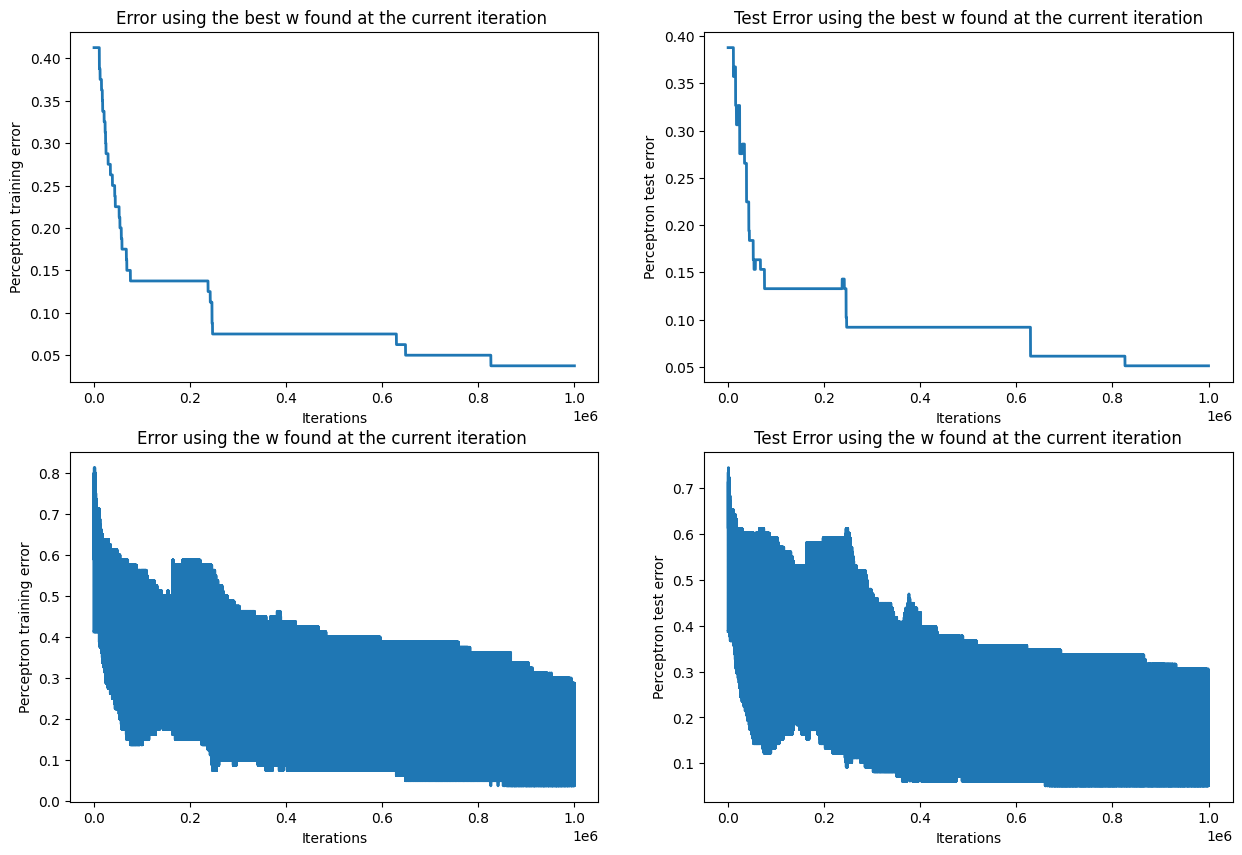

In [18]:
error_list_testBest = error_models(x_test, y_test, w_listBest)
error_list_test = error_models(x_test, y_test, w_list)
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes[0][0].plot([i for i in range(len(w_listBest))], error_list_trainBest, linewidth=2)
axes[0][0].set_xlabel('Iterations')
axes[0][0].set_ylabel('Perceptron training error')
axes[0][0].set_title('Error using the best w found at the current iteration ')
axes[0][1].plot([i for i in range(len(w_list))], error_list_testBest, linewidth=2)
axes[0][1].set_xlabel('Iterations')
axes[0][1].set_ylabel('Perceptron test error')
axes[0][1].set_title('Test Error using the best w found at the current iteration')
axes[1][0].plot([i for i in range(len(w_list))], error_list_train, linewidth=2)
axes[1][0].set_xlabel('Iterations')
axes[1][0].set_ylabel('Perceptron training error')
axes[1][0].set_title('Error using the w found at the current iteration ')
axes[1][1].plot([i for i in range(len(w_list))], error_list_test, linewidth=2)
axes[1][1].set_xlabel('Iterations')
axes[1][1].set_ylabel('Perceptron test error')
axes[1][1].set_title('Test Error using the w found at the current iteration')

**TO DO 5**: Answer in the next cell:

Consider the plots above. How do the errors compare? Can you identify a some particular property? 

- The general trend of all the four subplots is that the error is decreasing after each and every iteration, this is due to the fact that the weights of our parameter w are constantly getting more advanced as the perceptron algorithm visits more missclassified points. We can say that the plot[0][0] for the **best w** is **monotonically non-increasing**, as these are those weights that satisfied the condition that the current error must be lower than the previous best one, whereas plot [0][1] is in some sense similar but not monotonically decreasing the entire time as these are datapoints that the model has never seen before and is predicting on, but the overall performance is one that is acceptable. 

- The bottom two plots depict the errors also decreasing as the iterations increase, but not for the best parameters, but just for the general current one of the iteration. 

# Logistic Regression
Now we use logistic regression, as implemented in Scikit-learn, to predict labels. We first do it for 2 labels and then for 3 labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [19]:
import random
# Let's reinitialize the random seed 
random.seed(1)
np.random.seed(1)

# In the following we will keep the dataset with only two classes (which we aggregated before)
m_t = 80
x_train, y_train, x_test, y_test = create_train_val_test_datasets_with_constraints(X, Y, m_t, len(Y)-m_t, 25)
print('Dataset with constraints successfully created')

Dataset with constraints successfully created


To define a logistic regression model in Scikit-learn use the instruction

`linear_model.LogisticRegression(C=1e5, max_iter=?)`

`C` is the inverse of the regularization strength. We well see more about regularization later in the course. Setting `C` to a high value is almost as ignoring regularization, so the instruction above corresponds to the logistic regression you have seen in class. Choose the proper number of iterations: max_iter.

To learn the model you need to use the `fit(...)` instruction and to predict you need to use the `predict(...)` function. See the Scikit-learn documentation for how to use it (have a look at the logreg.score method too).

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples missclassified in the training set and in the test set.

In [20]:
# TODO 6
# Logistic regression for 2 classes
# To compute the error rate (classification loss you can use the function "classification_loss" you built before)
max_iterations = 1000
error_rate_training = 0
error_rate_test = 0
error_rate_test_sklearn = 0

# YOUR CODE HERE
logreg = linear_model.LogisticRegression(C=1e5, max_iter=max_iterations).fit(x_train, y_train)
y_predictions_test = logreg.predict(x_test)
y_predictions_train = logreg.predict(x_train)

# Perceptron comparison with logreg (out of curiosity)
# w_new, _, _, _, _ , _ = perceptron(x_train, y_train, max_iterations)

# error_rate_training = compute_fraction_missclassified(x_train, y_train, w_new)
# error_rate_test = compute_fraction_missclassified(x_test, y_test, w_new)
# error_rate_test_sklearn = classification_loss(y_test, y_predictions_test)

error_rate_training = classification_loss(y_train, y_predictions_train)
error_rate_test = classification_loss(y_test, y_predictions_test)
error_rate_test_sklearn = 1 - logreg.score(x_test, y_test)


print("Error rate on training set: "+str(error_rate_training))
print("Error rate on test set: "+str(error_rate_test))
print(f"Compare the estimate of generalization with the sklearn implementation {error_rate_test_sklearn}")

Error rate on training set: 0.0
Error rate on test set: 0.09183673469387756
Compare the estimate of generalization with the sklearn implementation 0.09183673469387754


In [21]:
assert np.isclose(error_rate_test, error_rate_test_sklearn)

**TO DO 7**: Answer in the next cell:

- If you get a zero training error using the logistic regression, what can you say about data separability?

- In such case, would the perceptron be able to stop even without a number of maximum iterations? If yes, can we find an upperbound for the number of iterations required by the perceptron in order to stop?

1. Yes, we do get 0 training error for the logistic regression approach, if this is the case we can say that there is definetly one, if not many hyperplanes that can seperate our data in $\mathbb{R}^{n}$ n being the number of dimensions of each datapoint in **x_train**, the data is **linearly seperable** ,what is intersting to note is that this holds true only to the training dataset, when the model visits unseen data this may not be the case everytime. 

2. Yes, the perceptron would be able to stop even without a maximum number of iterations as the data is linearly seperable and it can find a set of feasible parameters that will completely seperate the datapoints. The perceptron algorithm stops in a finite number of steps K, where it is defined as ${K}={M}^{2}{B}^{2}$, where M is the infimum norm over the parameters and B is the maximum norm of the datapoints in X. The value that we obtain from K can be thought as an upper bound on the number of interations. 

**TO DO 8**:

Consider the perceptron algorithm and allow it to run for an unlimited number of iterations. Complete the following function `bound_K_perceptron()`:

Input:
- a data matrix $X \in \mathbb{R}^{m \times d}$
- the response vector $Y\in \mathbb{R}^m$
- the extended coefficient vector $w \in \mathbb{R}^{d+1}$ (whose first element is the intercept) of the linear model

Output: 
- an upper bound $K$ on the number of iterations needed by the perceptron to stop. If the input data does not allow to obtain such bound, return $K=-1$.

In [22]:
def bound_K_perceptron(x_train : np.ndarray, y_train : np.ndarray, w : np.ndarray):
    """
    :param x_train: training data, each row is a data sample (m \times d)
    :param y_train: vector of labels
    :param w: model coefficients, the first element is the intercept
    
    :return: A scalar K that bounds the number of iterations needed by the perceptron to stop.
             If w does not allow to compute the bound, return K = -1
    """
    # remember to add a column of ones
    assert x_train.shape[1] == d
    x_train = np.hstack((np.ones((x_train.shape[0],1)), x_train))

    # first check if data is all linearly seperable or not 
    if np.all (y_train*np.matmul(w,x_train.T) > 0): 
        B = max([np.linalg.norm(datapoint) for datapoint in x_train])
        M = np.linalg.norm(w)
        K = (M**2)*(B**2)
    else: 
        K = -1
    return K

In [23]:
# check what happens using the model found by the logistic regression
w_logreg = np.concatenate((logreg.intercept_, np.ndarray.flatten(logreg.coef_)))
K = bound_K_perceptron(x_train, y_train, w_logreg)
print('K =', K)


K = 2869820040.815864


Now we do logistic regression for classification with 3 classes.

In [24]:
random.seed(ID_number)
np.random.seed(ID_number)

X = wine.data
Y = wine.target

m_t = 80
x_train, y_train, x_test, y_test = create_train_val_test_datasets_with_constraints(X, Y, m_t, len(Y)-m_t, 20)
print('Dataset with constraints successfully created')

_, counts = np.unique(y_train, return_counts=True)
assert (counts >= 20).all()
_, counts = np.unique(y_test, return_counts=True)
assert (counts >= 20).all()

Dataset with constraints successfully created


In [25]:
# TODO 9
# Logistic regression for 3 classes
# To compute the error rate (classification loss you can use the function "classification_loss" you built before)
# Choose the proper number of iterations: max_iter.
# Very similar to TODO 6
max_iter = 1000
error_rate_training = 0
error_rate_test = 0
error_rate_test_sklearn = 0
# YOUR CODE HERE

logreg = linear_model.LogisticRegression(C=1e5, max_iter=max_iterations).fit(x_train, y_train)
y_predictions_test = logreg.predict(x_test)
y_predictions_train = logreg.predict(x_train)

error_rate_training = classification_loss(y_train, y_predictions_train)
error_rate_test = classification_loss(y_test, y_predictions_test)
error_rate_test_sklearn = 1 - logreg.score(x_test, y_test)

print("Error rate on training set: "+str(error_rate_training))
print("Error rate on test set: "+str(error_rate_test))
print(f"Compare the estimate of generalization with the sklearn implementation {error_rate_test_sklearn}")

Error rate on training set: 0.0
Error rate on test set: 0.08163265306122448
Compare the estimate of generalization with the sklearn implementation 0.08163265306122447


In [26]:
assert np.isclose(error_rate_test, error_rate_test_sklearn)

We now are going to plot prediction boundaries of a logistic regression model, in order to plot them we need to reduce the number of features to 2: pick two features and restrict the dataset to include only two features, whose indices are specified in the `features` vector below. Then split into training and test.

In [27]:
print(y_train)

[1 0 2 1 1 0 1 1 1 0 0 0 2 0 0 1 2 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 2 1 2 1 1
 2 1 1 2 0 2 0 1 1 2 0 2 2 2 0 2 2 2 1 0 0 0 0 2 2 0 1 1 2 1 1 0 2 1 1 1 0
 2 1 1 0 1 1]


In [28]:
# TODO 10
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                 'Proline']
labels_list = ['class_0', 'class_1', 'class_2']

index_feature1 = 0  # You can choose the feature you prefer here
index_feature2 = 9 # You can choose the feature you prefer here
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X = X[:,features]

# In the following we will keep the dataset with 3 classes
m_t = 80
x_train, y_train, x_test, y_test = create_train_val_test_datasets_with_constraints(X, Y, m_t, len(Y)-m_t, 20)

# Fit a model on the reduced set of fetures (use again Scikit-learn to define the logistic regression model)
# YOUR CODE HERE
logreg = linear_model.LogisticRegression(C=1e5, max_iter=max_iterations).fit(x_train, y_train)



In [29]:
assert logreg.predict(x_test).shape == (x_test.shape[0], )

The code below uses the model in `logreg` to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

Text(0.5, 1.0, 'Test set')

<Figure size 400x300 with 0 Axes>

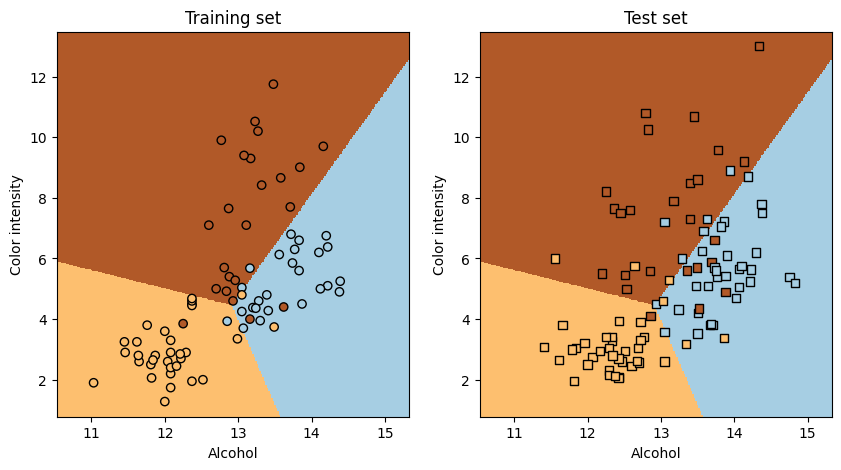

In [30]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].pcolormesh(xx, yy, Z[:-1,:-1], cmap=plt.cm.Paired)

# Plot also the training points
axes[0].scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
axes[0].set_xlabel(feature_name0)
axes[0].set_ylabel(feature_name1)

axes[0].set_xlim(xx.min(), xx.max())
axes[0].set_ylim(yy.min(), yy.max())
axes[0].set_title('Training set')

# Put the result into a color plot
Z = Z.reshape(xx.shape)
axes[1].pcolormesh(xx, yy, Z[:-1,:-1], cmap=plt.cm.Paired)

# Plot also the test points 
axes[1].scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
axes[1].set_xlabel(feature_name0)
axes[1].set_ylabel(feature_name1)

axes[1].set_xlim(xx.min(), xx.max())
axes[1].set_ylim(yy.min(), yy.max())
axes[1].set_title('Test set')

**TO DO 11**: Answer in the next cell (you do not need more than 5-7 lines):

- What is the shape of the decision boundaries in the higher dimensional space ($\mathbb{R}^d$)? Why?

- In this lower dimensional space, are the features linearly separable? What if you consider the entire feature vector (without any dimensionality reduction)?  


1. The shape of the decision boundries in $\mathbb{R}^d$ depend on the **number of classes we're classifying between and union of the subsets of the hyperplanes** that form the overall structure of the decision boundries, these are those hyperplanes that seperate one class from the other. If we're talking only about binary classification then the hyperplane and the decision boundry is the same. When it comes to the number of hyperplanes required that can vary on the approach, but the **minimum number of hyperplanes required in our case with 3 labels would be 2 hyperplanes of** $\mathbb{R}^{d-1}$, the reason to have 2 hyperplanes as a minimum is because these two hyperplanes can arrange each other in such a way so that they seperate the three classes. 

2. No, in this lower dimensional space the features are **not linearly seperable**, we can visualize the same from the plot above as well. If we consider the entire feature vector, consisting of all d features, then **yes all the datapoints are linearly seperable in our problem for the datapoints in the train set**, we've proved the same earlier by getting training error 0 and also by finding an upper bound on the finite number of steps required for the perceptron to stop at. It's important to note that this is not generally true for all kinds of classification problems but in our case it is, and only for the training data, and one must conduct the checks, for example calculating error and seeing if its 0, to proove that the data that they're working with is linearly seperable or not. 